In [1]:
#import packages
import os
import numpy as np
import h5py

from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential,Model
from keras.layers import Conv2D, MaxPooling2D,Activation, Dropout, Flatten, Dense,Input
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D  

from keras import applications
from keras import optimizers
from keras.optimizers import SGD
from keras import backend as K

#config the GPU. If you don't use GPU commen this part
from keras.backend.tensorflow_backend import set_session
import tensorflow as tf
config = tf.ConfigProto()  
config.gpu_options.allow_growth = True  
config.gpu_options.per_process_gpu_memory_fraction = 0.8
set_session(tf.Session(config=config))
print('configed')

Using TensorFlow backend.


configed


In [2]:
#事实上用了3个model的feature，'Features_InceptionV3.h5', 'Features_ResNet50.h5', 'Features_VGG19.h5'，之所以不用4个原因又是MemoryError  
X_train = []
X_test = []
X_validation = []
path_features = 'D:\\EE628\\final_dogs&cats\\feature_4\\'
features = os.listdir(path_features )
features

['Features_InceptionV3.h5',
 'Features_ResNet50.h5',
 'Features_VGG16.h5',
 'Features_VGG19.h5']

In [3]:
for feature in features:
    with h5py.File(path_features+feature, 'r') as h:
        train=np.array(h['train'])
        print(train.shape)
        shape=train.shape
        train=train.reshape(shape[0],shape[1]*shape[2]*shape[3])
        X_train.append(train)
        print(len(X_train))
        del train
        
        validation=np.array(h['validation'])
        print(validation.shape)
        shape=validation.shape
        validation=validation.reshape(shape[0],shape[1]*shape[2]*shape[3])
        print(validation.shape)
        X_validation.append(validation)
        print(len(X_validation))
        del validation
        
        test=np.array(h['test'])
        print(test.shape)
        shape=test.shape
        test=test.reshape(shape[0],shape[1]*shape[2]*shape[3])
        X_test.append(test)
        print(len(X_test))
        del test
        y_train = np.array(h['label_train'])
        y_validation = np.array(h['label_validation'])

X_train = np.concatenate(X_train, axis=1)
print(X_train.shape)
X_validation = np.concatenate(X_validation, axis=1)
X_test = np.concatenate(X_test, axis=1)
#这是个尝试，但是由于MemoryError没有成果，已经形成的所有结果基于'Features_InceptionV3.h5', 'Features_ResNet50.h5', 'Features_VGG19.h5'这三个feature

(16666, 5, 5, 2048)
1
(8334, 5, 5, 2048)
(8334, 51200)
1
(12500, 5, 5, 2048)
1
(16666, 1, 1, 2048)
2
(8334, 1, 1, 2048)
(8334, 2048)
2
(12500, 1, 1, 2048)
2
(16666, 7, 7, 512)
3
(8334, 7, 7, 512)
(8334, 25088)
3
(12500, 7, 7, 512)
3


MemoryError: 

In [37]:
epochs = 100
batch_size = 128

model = Sequential()
model.add(Dense(256, activation='relu',input_shape=X_train.shape[1:]))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', metrics=['accuracy'])

hist_combined=model.fit(X_train, y_train,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_validation, y_validation))

Train on 16666 samples, validate on 8334 samples
Epoch 1/100
16666/16666 [==============================] - 20s 1ms/step - loss: 0.6711 - acc: 0.9518 - val_loss: 0.2562 - val_acc: 0.9830
Epoch 2/100
16666/16666 [==============================] - 7s 404us/step - loss: 0.4458 - acc: 0.9709 - val_loss: 0.2618 - val_acc: 0.9828
Epoch 3/100
16666/16666 [==============================] - 6s 386us/step - loss: 0.3649 - acc: 0.9764 - val_loss: 0.3696 - val_acc: 0.9761
Epoch 4/100
16666/16666 [==============================] - 6s 377us/step - loss: 0.3142 - acc: 0.9795 - val_loss: 0.2776 - val_acc: 0.9821
Epoch 5/100
16666/16666 [==============================] - 6s 380us/step - loss: 0.3005 - acc: 0.9806 - val_loss: 0.4034 - val_acc: 0.9742
Epoch 6/100
16666/16666 [==============================] - 6s 377us/step - loss: 0.3997 - acc: 0.9743 - val_loss: 0.3244 - val_acc: 0.9794
Epoch 7/100
16666/16666 [==============================] - 6s 388us/step - loss: 0.2947 - acc: 0.9812 - val_loss: 0.31

In [39]:
model.summary()
path_folder='D:\\EE628\\final_dogs&cats\\Combined_prediction\\'
model.save_weights(path_folder+'4_2_combined_top_weight.h5')
print('Weight saved')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               20054272  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 20,054,529
Trainable params: 20,054,529
Non-trainable params: 0
_________________________________________________________________
Weight saved


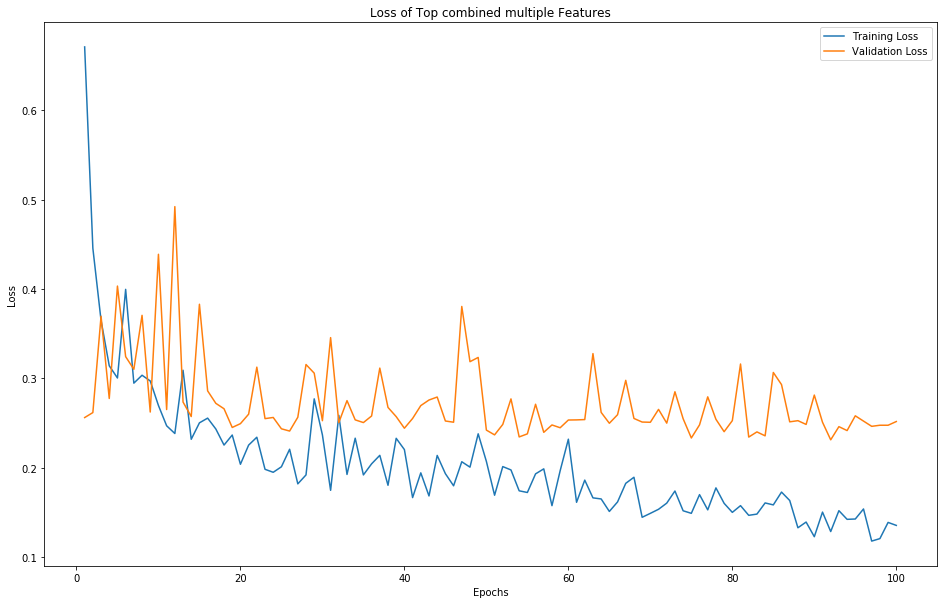

Plot saved


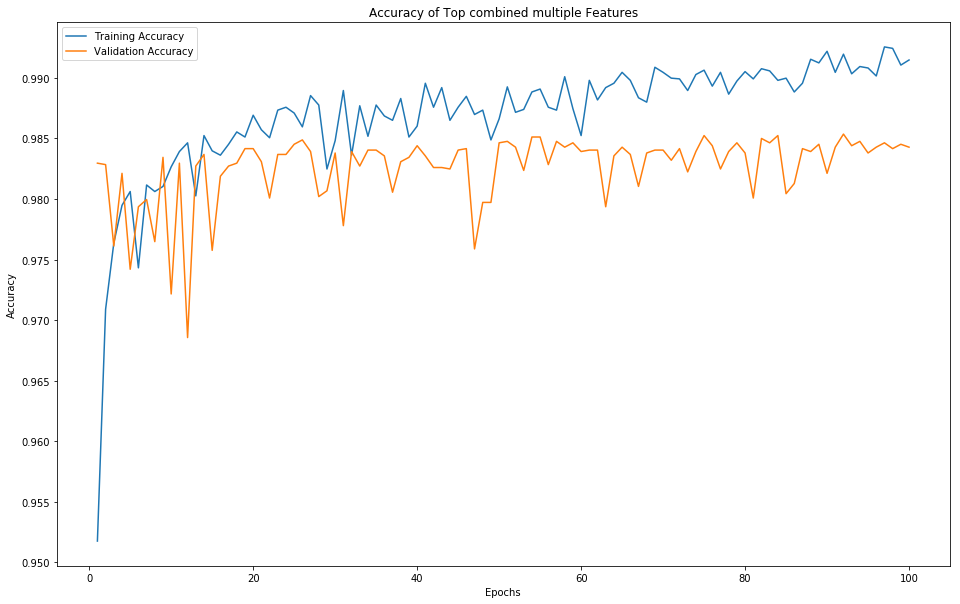

Plot saved


In [41]:
#Creating training plot
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10)) 
epochs = range(1, len(hist_combined.history['acc']) + 1)
plt.plot(epochs, hist_combined.history['loss'], label='Training Loss') 
plt.plot(epochs, hist_combined.history['val_loss'], label='Validation Loss') 

plt.title('Loss of Top combined multiple Features')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(path_folder+'4_2_loss_combined.jpg')
plt.show()
print('Plot saved')

plt.figure(figsize=(16,10)) 
epochs = range(1, len(hist_combined.history['acc']) + 1)
plt.plot(epochs, hist_combined.history['acc'], label='Training Accuracy') 
plt.plot(epochs, hist_combined.history['val_acc'], label='Validation Accuracy') 
plt.title('Accuracy of Top combined multiple Features')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(path_folder+'4_2_acc_combined.jpg')
plt.show()
print('Plot saved')

In [42]:
#predict the class
pred_class = model.predict(X_test)
print(pred_class[:5])

[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]]


In [55]:
#save the prediction
ID_n = np.arange(1,len(X_test)+1)
ID={'id':ID_n}
import os
import pandas as pd

predict_data_dir = 'D:\\EE628\\final_dogs&cats\\data\\test'
test_img = os.listdir(predict_data_dir+os.sep+'test')
print(test_img[0:5])

prediction_label_df=pd.DataFrame(ID)
prediction_label_df['label']=pred_class
prediction_label_df['Image']=test_img
#"gbk" is easy to open in excel, utf is easy to reload to python.
prediction_label_df.to_csv(path_folder+'4_2_combined_pred_label_img_gbk.csv',header=True,index=False,encoding="gbk", sep=',')
prediction_label_df.to_csv(path_folder+'4_2_combined_pred_label_gbk.csv',columns=['id','label'],header=True,index=False,encoding="gbk", sep=',')
prediction_label_df.to_csv(path_folder+'4_2_combined_pred_label_img_utf8.csv',header=True,index=False)
prediction_label_df.to_csv(path_folder+'4_2_combined_pred_label_utf8.csv',columns=['id','label'],header=True,index=False)
print('Prediction save to ',path_folder)

['1.jpg', '10.jpg', '100.jpg', '1000.jpg', '10000.jpg', '10001.jpg', '10002.jpg', '10003.jpg', '10004.jpg', '10005.jpg']
Prediction save to  D:\EE628\final_dogs&cats\gpu\
